# **이중우선순위큐**
**문제설명**

이중 우선순위 큐는 다음 연산을 할 수 있는 자료구조를 말합니다.

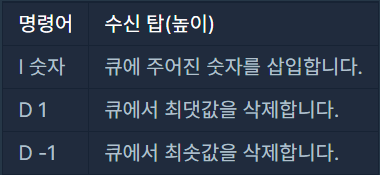

이중 우선순위 큐가 할 연산 operations가 매개변수로 주어질 때, 모든 연산을 처리한 후 큐가 비어있으면 [0,0] 비어있지 않으면 [최댓값, 최솟값]을 return 하도록 solution 함수를 구현해주세요.

## **제한사항**

*   operations는 길이가 1 이상 1,000,000 이하인 문자열 배열입니다.
*   perations의 원소는 큐가 수행할 연산을 나타냅니다.
    * 원소는 “명령어 데이터” 형식으로 주어집니다.- 최댓값/최솟값을 삭제하는 연산에서 최댓값/최솟값이 둘 이상인 경우, 하나만 삭제합니다.
*   빈 큐에 데이터를 삭제하라는 연산이 주어질 경우, 해당 연산은 무시합니다.

**입출력 예**

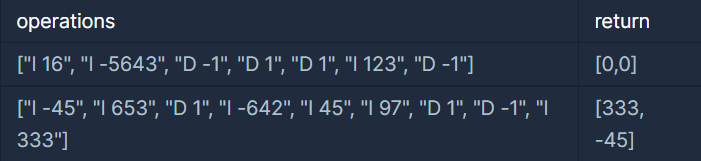

**입출력 예 설명**

입출력 예 #1
* 16과 -5643을 삽입합니다.
* 최솟값을 삭제합니다. -5643이 삭제되고 16이 남아있습니다.
* 최댓값을 삭제합니다. 16이 삭제되고 이중 우선순위 큐는 비어있습니다.
* 우선순위 큐가 비어있으므로 최댓값 삭제 연산이 무시됩니다.
* 123을 삽입합니다.
* 최솟값을 삭제합니다. 123이 삭제되고 이중 우선순위 큐는 비어있습니다.

따라서 [0, 0]을 반환합니다.

입출력 예 #2
* 45와 653을 삽입후 최댓값(653)을 삭제합니다. -45가 남아있습니다.
* -642, 45, 97을 삽입 후 최댓값(97), 최솟값(-642)을 삭제합니다. -45와 45가 남아있습니다.
* 333을 삽입합니다.

이중 우선순위 큐에 -45, 45, 333이 남아있으므로, [333, -45]를 반환합니다.

In [ ]:
#heapq
from heapq import heappush, heappop
def solution(operations):
    que_min = []
    que_max = []
    lenth = 0
    for i, elem in enumerate(operations):
        oper = elem.split()
        if oper[0] == 'I':
            heappush(que_min, (int(oper[1]), i))
            heappush(que_max, (-int(oper[1]), i))
            lenth += 1
        elif oper[0] == 'D' and oper[1] == '1':
            if lenth == 0:
                continue
            lenth -= 1
            heappop(que_max)
        elif oper[0] == 'D' and oper[1] == '-1':
            if lenth == 0:
                continue
            lenth -= 1
            heappop(que_min)
    
    answer = [0, 0]
    minlist = []
    minlist2 = []
    if lenth > 0:
        for a, b in que_min:
            minlist.append((a, b))
        for a, b in que_max:
            minlist2.append((-a, b))
        minset = set(minlist) & set(minlist2)
        min_lst = list(minset)
        min_lst.sort()
        answer = []
        answer.append(min_lst[len(min_lst)-1][0])
        answer.append(min_lst[0][0])
    return answer